In [3]:
#   ______                                       ___     
#  /\__  _\                                    /'___`\   
#  \/_/\ \/    __     _ __    __     __       /\_\ /\ \  
#     \ \ \  /'__`\  /\`'__\/'__`\ /'__`\     \/_/// /__ 
#      \ \ \/\ \L\.\_\ \ \//\  __//\ \L\.\_      // /_\ \
#       \ \_\ \__/.\_\\ \_\\ \____\ \__/.\_\    /\______/
#        \/_/\/__/\/_/ \/_/ \/____/\/__/\/_/    \/_____/ 
#                                                                                                     

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from casadi import *

## Punto 1. 

In [2]:
x_1 = np.linspace(-1, 31, 5000)
y_1 = np.linspace(-2, 36, 5000)

x, y = np.meshgrid(x_1, y_1)
f = 5*exp(-0.01*((x-15)**2 + (y-20)**2)) - 2*exp(-0.08*((x-20)**2 + (y-15)**2)) + 3*exp(-0.08*((x-25)**2 + (y-10)**2)) + 2*exp(-0.1*((x-10)**2 + (y-10)**2)) - 2*exp(-0.5*((x-5)**2 + (y-10)**2)) - 4*exp(-0.1*((x-15)**2 + (y-5)**2)) - 2*exp(-0.5*((x-8)**2 + (y-25)**2)) - 2*exp(-0.5*((x-21)**2 + (y-25)**2)) + 2*exp(-0.5*((x-25)**2 + (y-16)**2)) + 2*exp(-0.5*((x-5)**2 + (y-14)**2))

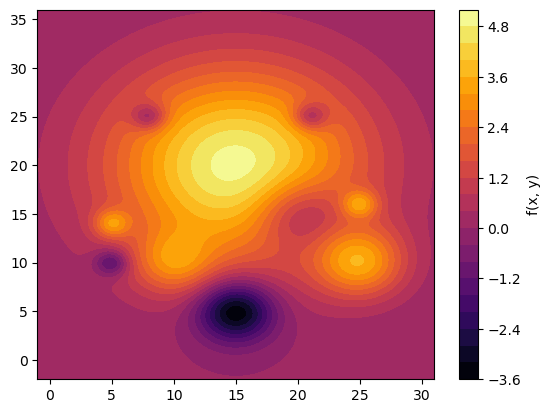

In [3]:
plt.contourf(x, y, f, levels=25, cmap="inferno")
plt.colorbar(label='f(x, y)')

In [4]:
opti = Opti()
x1 = opti.variable()
y1 = opti.variable()
f_ = 5*exp(-0.01*((x1-15)**2 + (y1-20)**2)) - 2*exp(-0.08*((x1-20)**2 + (y1-15)**2)) + 3*exp(-0.08*((x1-25)**2 + (y1-10)**2)) + 2*exp(-0.1*((x1-10)**2 + (y1-10)**2)) - 2*exp(-0.5*((x1-5)**2 + (y1-10)**2)) - 4*exp(-0.1*((x1-15)**2 + (y1-5)**2)) - 2*exp(-0.5*((x1-8)**2 + (y1-25)**2)) - 2*exp(-0.5*((x1-21)**2 + (y1-25)**2)) + 2*exp(-0.5*((x1-25)**2 + (y1-16)**2)) + 2*exp(-0.5*((x1-5)**2 + (y1-14)**2))


initial = [(15,20),(25,10),(25,16),(10,10),(5,14)]
valores = []


opti.minimize(-f_)
opti.solver('sqpmethod')
opti.subject_to(x1>=-1)
opti.subject_to(31>=x1)
opti.subject_to(y1>=-2)
opti.subject_to(36>=y1)

for i in initial:
    xi, yi = i
    opti.set_initial(x1, xi)
    opti.set_initial(y1, yi)
    sol = opti.solve()
    valores.append((sol.value(x1),sol.value(y1)))


qpOASES -- An Implementation of the Online Active Set Strategy.
Copyright (C) 2007-2015 by Hans Joachim Ferreau, Andreas Potschka,
Christian Kirches et al. All rights reserved.

qpOASES is distributed under the terms of the 
GNU Lesser General Public License 2.1 in the hope that it will be 
useful, but WITHOUT ANY WARRANTY; without even the implied warranty 
of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. 
See the GNU Lesser General Public License for more details.

-------------------------------------------
This is casadi::Sqpmethod.
Using exact Hessian
Number of variables:                               2
Number of constraints:                             4
Number of nonzeros in constraint Jacobian:         4
Number of nonzeros in Lagrangian Hessian:          4

iter      objective    inf_pr    inf_du     ||d||  lg(rg) ls    info
   0  -4.963377e+00  0.00e+00  2.93e-02  0.00e+00       -  0  - 


####################   qpOASES  --  QP NO.   1   #####################

    Iter

[(14.78471507565251, 20.215098377726218), (24.779908445161595, 10.220207209839627), (24.946150398624543, 16.003689398918638), (10.417425350184978, 10.946127704918585), (5.151029151928393, 14.066188866197285)]


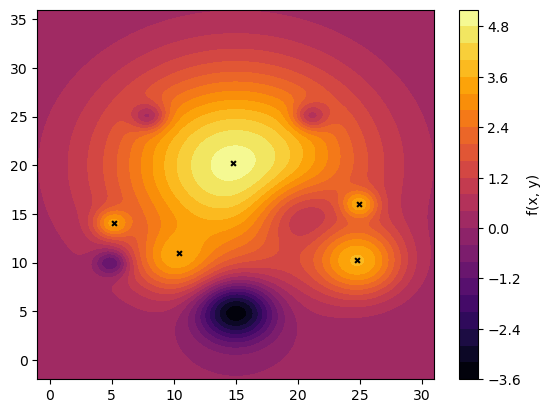

In [5]:
print(valores)
plt.contourf(x, y, f, levels=25, cmap="inferno")
plt.colorbar(label='f(x, y)')
for val in valores:
    plt.scatter(val[0], val[1], marker='x', color='black', s=12)



## Punto 2. 

## Punto 3. 

In [150]:
gamma1 = gamma2 = 0.4
A1 = A2 = 50.27
A3 = A4 = 28.27
a1 = 0.233
a2 = 0.242
a3 = a4 = 0.127
g = 980 #cm/s

Q = (3,3,0.03,0.03)
R = (0.0033, 0.0033)

xr =np.array([13.98,14.06,14.25,21.42])

x = MX.sym('x', 4)
u = MX.sym('u', 2)

dx1 = -(a1/A1)*sqrt(fmax(2*g*x[0],0.001))+a3/A1*sqrt(fmax(2*g*x[2],0.001))+gamma1/A1*u[0]
dx2 = -(a2/A2)*sqrt(fmax(2*g*x[1],0.001))+a4/A2*sqrt(fmax(2*g*x[3],0.001))+gamma2/A2*u[1]
dx3 = -(a3/A4)*sqrt(fmax(2*g*x[2],0.001))+(1-gamma2)/A3*u[1]
dx4 = -(a4/A4)*sqrt(fmax(2*g*x[3],0.001))+(1-gamma1)/A4*u[0]


func = vertcat(dx1,dx2,dx3,dx4)
f = Function('f', [x, u], [func])

In [151]:
int_opt = {"number_of_finite_elements":1,"tf":3}
intg = integrator('intg', 'rk', {'x':x,'p': u, 'ode': f(x,u)}, int_opt)
r = intg(x0 = x, p = u)
F = Function('F', [x, u], [r['xf']])

In [152]:
opti = Opti()
X = opti.variable(4, 20+1)
U = opti.variable(20, 2)
# Tanques
h1 = X[0,:]
h2 = X[1,:]
h3 = X[2,:]
h4 = X[3,:]

# Contorl
u1 = U[:,0]
u2 = U[:,1]
opti.subject_to(u1<60)
opti.subject_to(u2<60)

#valores iniciales
x0 = opti.parameter(4)
opti.subject_to(X[:,0] == x0)
opti.set_value(x0,vertcat(2,2,2,2))
xi = vertcat(2,2,2,2)

In [153]:
for k in range(20):
    opti.subject_to(X[:,k+1] == F(X[:,k],U[k,:]))

In [178]:
def solucion(Q,R,x_i,xr):
    Q1, Q2, Q3, Q4 = Q
    R1, R2 = R
    xr1,xr2,xr3,xr4 = xr 
    
    xval = DM.zeros(4,40)
    uval = DM.zeros(2,40)
    x_i = x_i
    
    
    function = (Q1* sumsqr(h1-xr1)+ Q2*sumsqr(h2-xr2)+ Q3*sumsqr(h3-xr3)+  Q4*sumsqr(h4-xr4))+ (R1*sumsqr(u1)+ R2*sumsqr(u2)) 
    opti.minimize(function)
    opti.set_value(x0,xi)
    opt_1 = dict(print_time=False)
    opt_2 = dict(print_level=0)
    opti.solver('ipopt',opt_1,opt_2)
    solution = opti.solve()
    _mpc_ = opti.to_function('mpc_step',[x0, opti.x, opti.lam_g],[U[0,:], opti.x, opti.lam_g])
    u = solution.value(U[0,:])
    x = solution.value(opti.x)
    l = solution.value(opti.lam_g)

    for i in range(40):
        xval[:,i] = x_i
        uval[:,i] = u

        x_i = F(x_i,u)
        [u,x,lam] = _mpc_(x_i,x,l)
    return  xval.T,uval.T

Gráficas de las siguientes condiciones: 

$$
Q = \begin{bmatrix}
3 & 0 & 0 & 0 \\
0 & 3 & 0 & 0 \\
0 & 0 & 0.03 & 0 \\
0 & 0 & 0 & 0.03 \\
\end{bmatrix}
$$
$$
R = 
\begin{bmatrix}
0.0033 & 0 \\
0 & 0.0 033 \\
\end{bmatrix}
$$

In [179]:
x_val, u_val = solucion(Q,R,xi,xr)

Text(0.5, 0, 'Tiempo [t]')

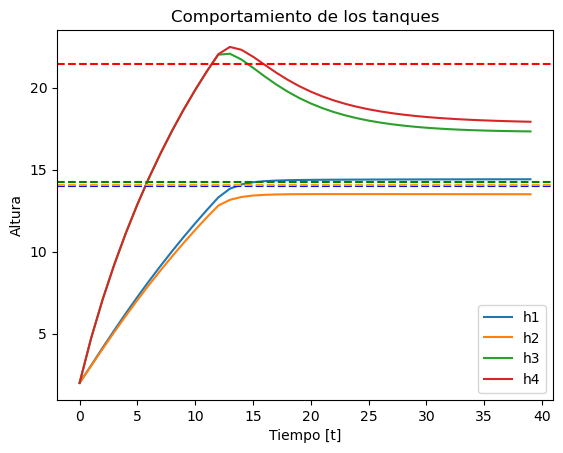

In [180]:
plt.plot(x_val)
plt.legend(["h1", "h2", "h3","h4"])
plt.axhline(y=13.98, color='b', linestyle='--')
plt.axhline(y=14.06, color='orange', linestyle='--')
plt.axhline(y=14.25, color='green', linestyle='--')
plt.axhline(y=21.42, color='r', linestyle='--')
plt.title("Comportamiento de los tanques")
plt.ylabel("Altura")
plt.xlabel("Tiempo [t]")

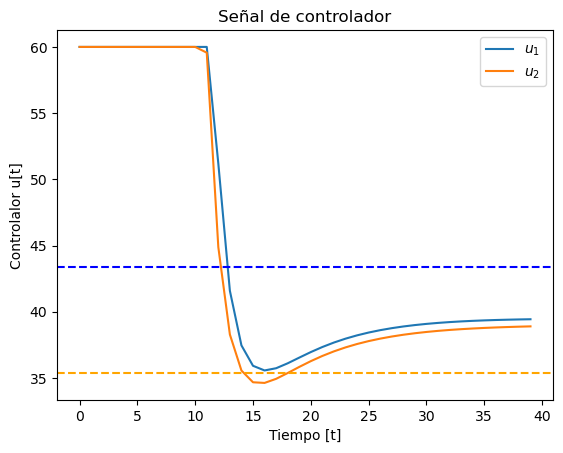

In [173]:
plt.plot(u_val)
plt.axhline(y=43.4, color='b', linestyle='--')
plt.axhline(y=35.4, color='orange', linestyle='--')
plt.title('Señal de controlador')
plt.ylabel('Controlalor u[t]')
plt.xlabel('Tiempo [t]')
plt.legend(["$u_1$", "$u_2$"])

Gráficas de las siguientes condiciones: 

$$
Q = \begin{bmatrix}
6 & 0 & 0 & 0 \\
0 & 6 & 0 & 0 \\
0 & 0 & 0.03 & 0 \\
0 & 0 & 0 & 0.03 \\
\end{bmatrix}
$$
$$
R = 
\begin{bmatrix}
0.0033 & 0 \\
0 & 0.0 033 \\
\end{bmatrix}
$$

In [158]:
Q1 = (6,6,0.03,0.03)
R1 = (0.005, 0.005)
x_val, u_val = solucion(Q1,R1,xi,xr)

Text(0.5, 0, 'Tiempo [t]')

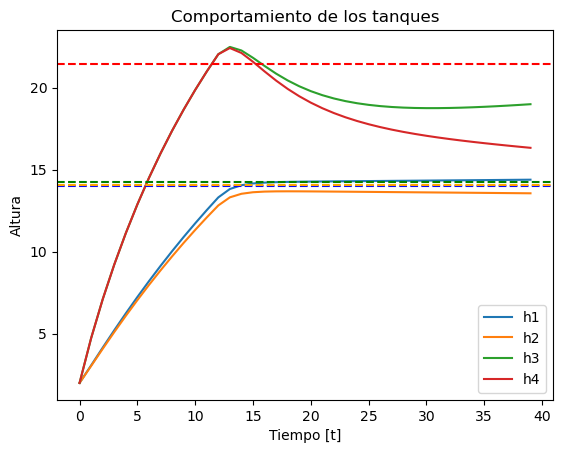

In [159]:
plt.plot(x_val)
plt.axhline(y=13.98, color='b', linestyle='--')
plt.axhline(y=14.06, color='orange', linestyle='--')
plt.axhline(y=14.25, color='green', linestyle='--')
plt.axhline(y=21.42, color='r', linestyle='--')
plt.legend(["h1", "h2", "h3","h4"])
plt.title("Comportamiento de los tanques")
plt.ylabel("Altura")
plt.xlabel("Tiempo [t]")

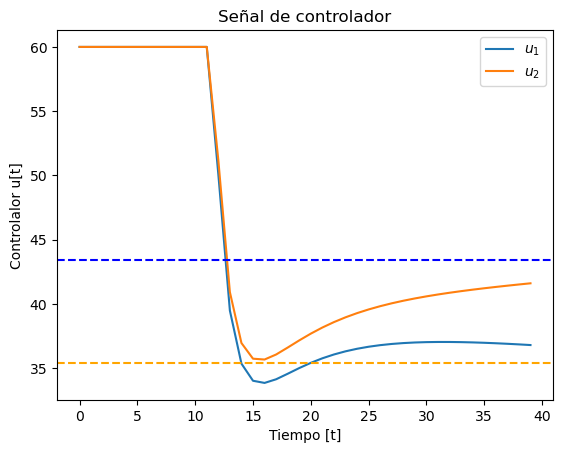

In [160]:
plt.plot(u_val)
plt.axhline(y=43.4, color='b', linestyle='--')
plt.axhline(y=35.4, color='orange', linestyle='--')
plt.title('Señal de controlador')
plt.ylabel('Controlalor u[t]')
plt.xlabel('Tiempo [t]')
plt.legend(["$u_1$", "$u_2$"])

Gráficas de las siguientes condiciones: 

$$
Q = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0.03 & 0 \\
0 & 0 & 0 & 0.03 \\
\end{bmatrix}
$$
$$
R = 
\begin{bmatrix}
0.0033 & 0 \\
0 & 0.0 033 \\
\end{bmatrix}
$$

In [161]:
Q2 = (1,1,0.03,0.03)
R2 = (0.0033, 0.0033)
x_val, u_val = solucion(Q2,R2,xi,xr)

Text(0.5, 0, 'Tiempo [t]')

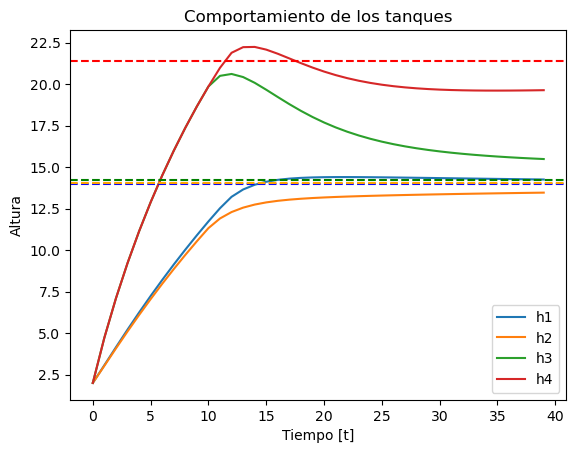

In [162]:
plt.plot(x_val)
plt.axhline(y=13.98, color='b', linestyle='--')
plt.axhline(y=14.06, color='orange', linestyle='--')
plt.axhline(y=14.25, color='green', linestyle='--')
plt.axhline(y=21.42, color='r', linestyle='--')
plt.legend(["h1", "h2", "h3","h4"])
plt.title("Comportamiento de los tanques")
plt.ylabel("Altura")
plt.xlabel("Tiempo [t]")

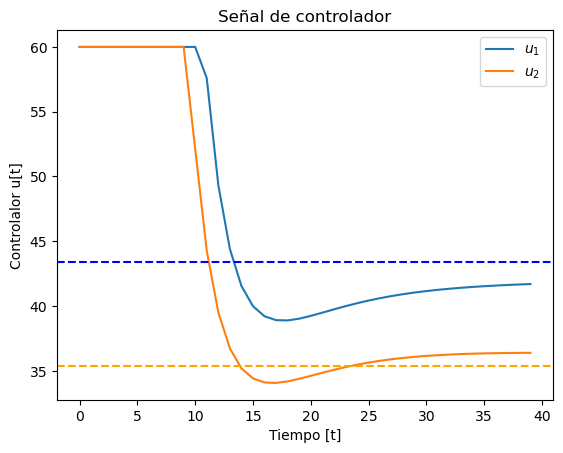

In [163]:
plt.plot(u_val)
plt.axhline(y=43.4, color='b', linestyle='--')
plt.axhline(y=35.4, color='orange', linestyle='--')
plt.title('Señal de controlador')
plt.ylabel('Controlalor u[t]')
plt.xlabel('Tiempo [t]')
plt.legend(["$u_1$", "$u_2$"])

Gráficas de las siguientes condiciones: 

$$
Q = \begin{bmatrix}
3 & 0 & 0 & 0 \\
0 & 3 & 0 & 0 \\
0 & 0 & 0.03 & 0 \\
0 & 0 & 0 & 0.03 \\
\end{bmatrix}
$$
$$
R = 
\begin{bmatrix}
0.001 & 0 \\
0 & 0.001 \\
\end{bmatrix}
$$

In [164]:
Q2 = (3,3,0.03,0.03)
R2 = (0.001, 0.001)
x_val, u_val = solucion(Q2,R2,xi,xr)

Text(0.5, 0, 'Tiempo [t]')

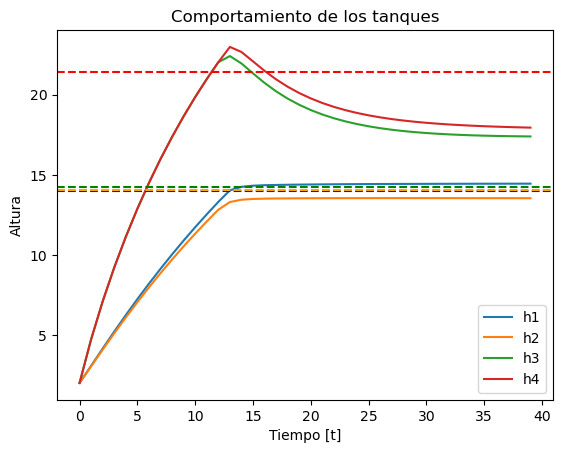

In [165]:
plt.plot(x_val)
plt.axhline(y=13.98, color='b', linestyle='--')
plt.axhline(y=14.06, color='orange', linestyle='--')
plt.axhline(y=14.25, color='green', linestyle='--')
plt.axhline(y=21.42, color='r', linestyle='--')
plt.legend(["h1", "h2", "h3","h4"])
plt.title("Comportamiento de los tanques")
plt.ylabel("Altura")
plt.xlabel("Tiempo [t]")

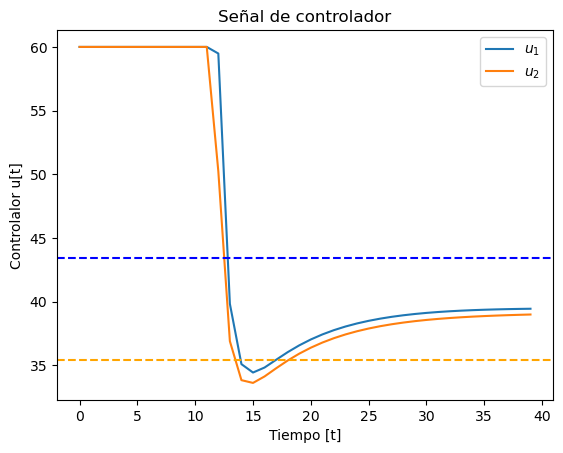

In [166]:
plt.plot(u_val)
plt.axhline(y=43.4, color='b', linestyle='--')
plt.axhline(y=35.4, color='orange', linestyle='--')
plt.title('Señal de controlador')
plt.ylabel('Controlalor u[t]')
plt.xlabel('Tiempo [t]')
plt.legend(["$u_1$", "$u_2$"])

Gráficas de las siguientes condiciones: 

$$
Q = \begin{bmatrix}
3 & 0 & 0 & 0 \\
0 & 3 & 0 & 0 \\
0 & 0 & 3 & 0 \\
0 & 0 & 0 & 3 \\
\end{bmatrix}
$$
$$
R = 
\begin{bmatrix}
0.1 & 0 \\
0 & 0.1 \\
\end{bmatrix}
$$

In [167]:
Q2 = (3,3,3,3)
R2 = (0.1, 0.1)

x_val, u_val = solucion(Q2,R2,xi,xr)

Text(0.5, 0, 'Tiempo [t]')

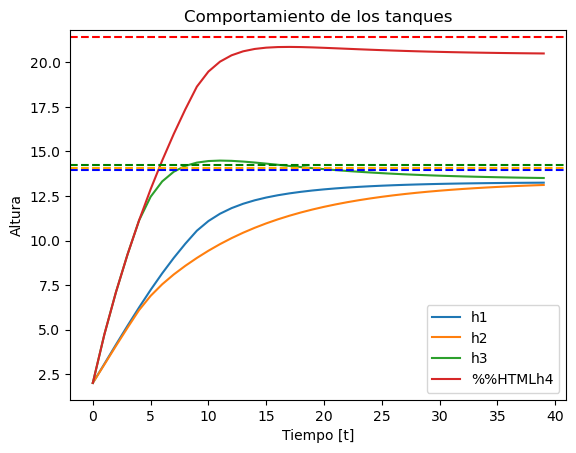

In [168]:
plt.plot(x_val)
plt.axhline(y=13.98, color='b', linestyle='--')
plt.axhline(y=14.06, color='orange', linestyle='--')
plt.axhline(y=14.25, color='green', linestyle='--')
plt.axhline(y=21.42, color='r', linestyle='--')
plt.legend(["h1", "h2", "h3","%%HTMLh4"])
plt.title("Comportamiento de los tanques")
plt.ylabel("Altura")
plt.xlabel("Tiempo [t]")

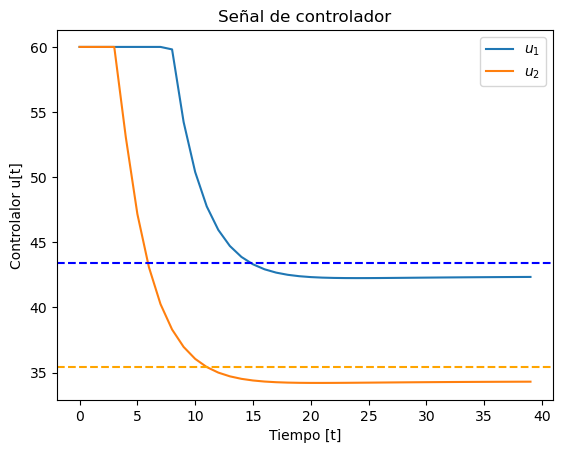

In [169]:
plt.plot(u_val)
plt.axhline(y=35.4, color='orange', linestyle='--')
plt.axhline(y=43.4, color='blue', linestyle='--')
plt.title('Señal de controlador')
plt.ylabel('Controlalor u[t]')
plt.xlabel('Tiempo [t]')
plt.legend(["$u_1$", "$u_2$"])

Considerando los diferentes valores de las matrices de costos Q y R, y queriendo llegar a los valores de establecimiento: 
$$
x_r = 
\begin{bmatrix}
13.98 \\
14.06  \\
14.25 \\
21.42
\end{bmatrix} \,u_r = 
\begin{bmatrix}
43.4 \\
35.4 \\
\end{bmatrix}
$$

Lo cual, se puede observar que para diferentes valores del costo matricial no genera estabilidad del sistema deseado en el tiempo requerido. No obstante, hay otras combinaciones de valores que genera esta estabilidad, siendo el caso para 
$$
Q = \begin{bmatrix}
3 & 0 & 0 & 0 \\
0 & 3 & 0 & 0 \\
0 & 0 & 3 & 0 \\
0 & 0 & 0 & 3 \\
\end{bmatrix}
\,
R = 
\begin{bmatrix}
0.1 & 0 \\
0 & 0.1 \\
\end{bmatrix}
$$


En el cual, si el valor se encuentra más grande para alguna variable podemos notar que se encuentra un mayor control de esta.  